In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [2]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/Lena-Gaussian-noise1.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 컬러 영상을 그레이 영상으로

In [3]:
# 프르윗 필터
gx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
gy = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],dtype=int)

In [4]:
# 프르윗 필터 컨벌루션
x = cv2.filter2D(gray_img, -1, gx)
y = cv2.filter2D(gray_img, -1, gy)

In [5]:
# uint8 (0~255) 타입으로 변경하고 영상 병합
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
output_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

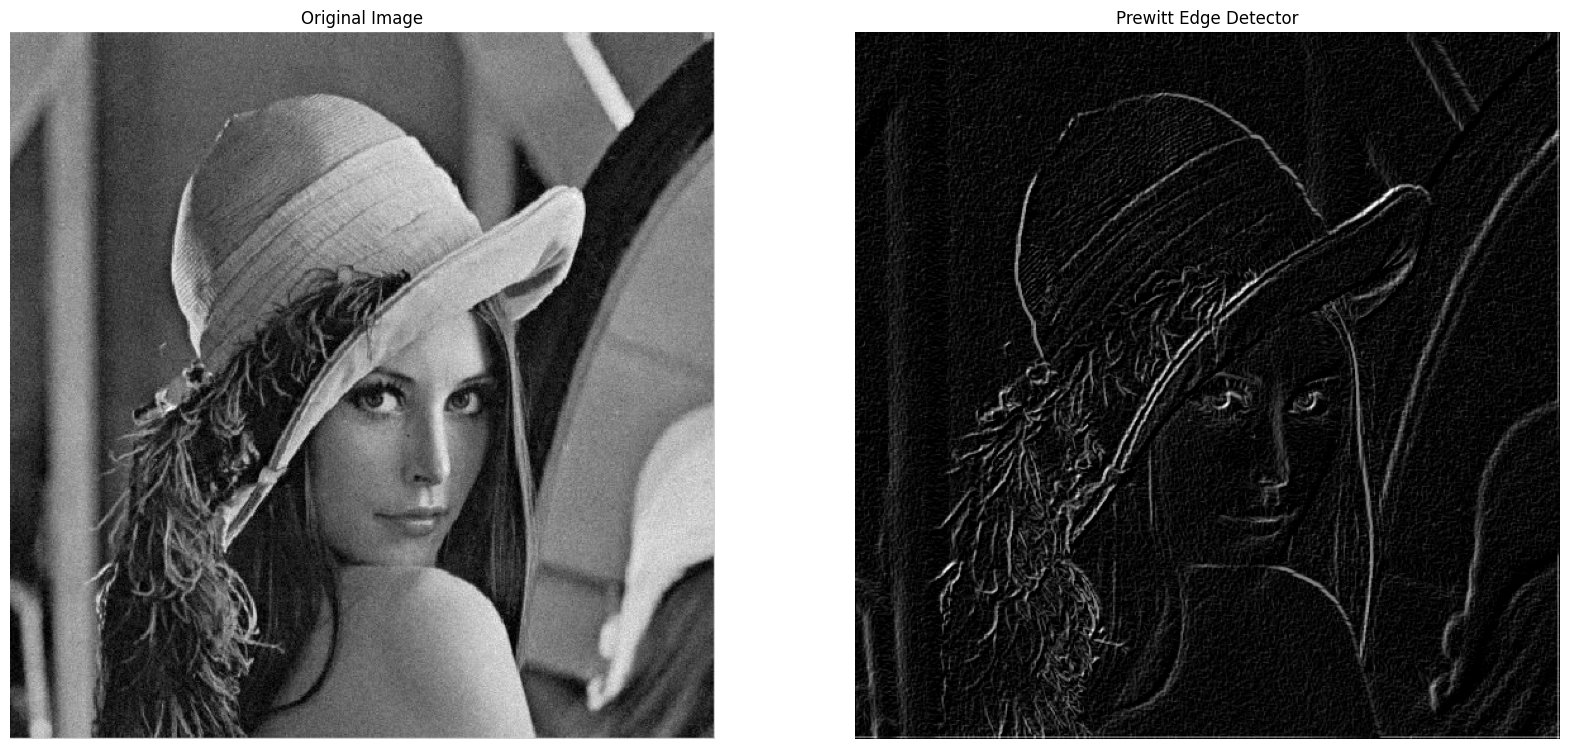

In [6]:
# 출력
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Prewitt Edge Detector")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.show()